In [65]:
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
# Definicja kolumn
columns = ['Wife_age', 'Wife_education', 'Husband_education', 'Number_children',
           'Wife_religion', 'Wife_working', 'Husband_occupation', 'Standard_of_living',
           'Media_exposure', 'Contraceptive_method']

# Wczytanie danych
df = pd.read_csv('cmc.data', names=columns)

# Przegląd pierwszych kilku wierszy danych
df.head()

,Wife_age,Wife_education,Husband_education,Number_children,Wife_religion,Wife_working,Husband_occupation,Standard_of_living,Media_exposure,Contraceptive_method
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


# Podstawowe statystyki dla zmiennych numerycznych

In [67]:
# Podstawowe statystyki dla zmiennych numerycznych
numerical_cols = ['Wife_age', 'Number_children']
basic_stats = df[numerical_cols].describe()
basic_stats.loc['median'] = df[numerical_cols].median()

# Dodanie kwantyli jako osobne wiersze
quantiles = df[numerical_cols].quantile([0.25, 0.5, 0.75])
quantiles.index = ['25%', '50%', '75%']

# Łączenie ramek danych
basic_stats = pd.concat([basic_stats, quantiles])

basic_stats

,Wife_age,Number_children
count,1473.000000,1473.000000
mean,32.538357,3.261371
std,8.227245,2.358549
min,16.000000,0.000000
25%,26.000000,1.000000
50%,32.000000,3.000000
75%,39.000000,4.000000
max,49.000000,16.000000
median,32.000000,3.000000
25%,26.000000,1.000000


#  Wizualizacja danych

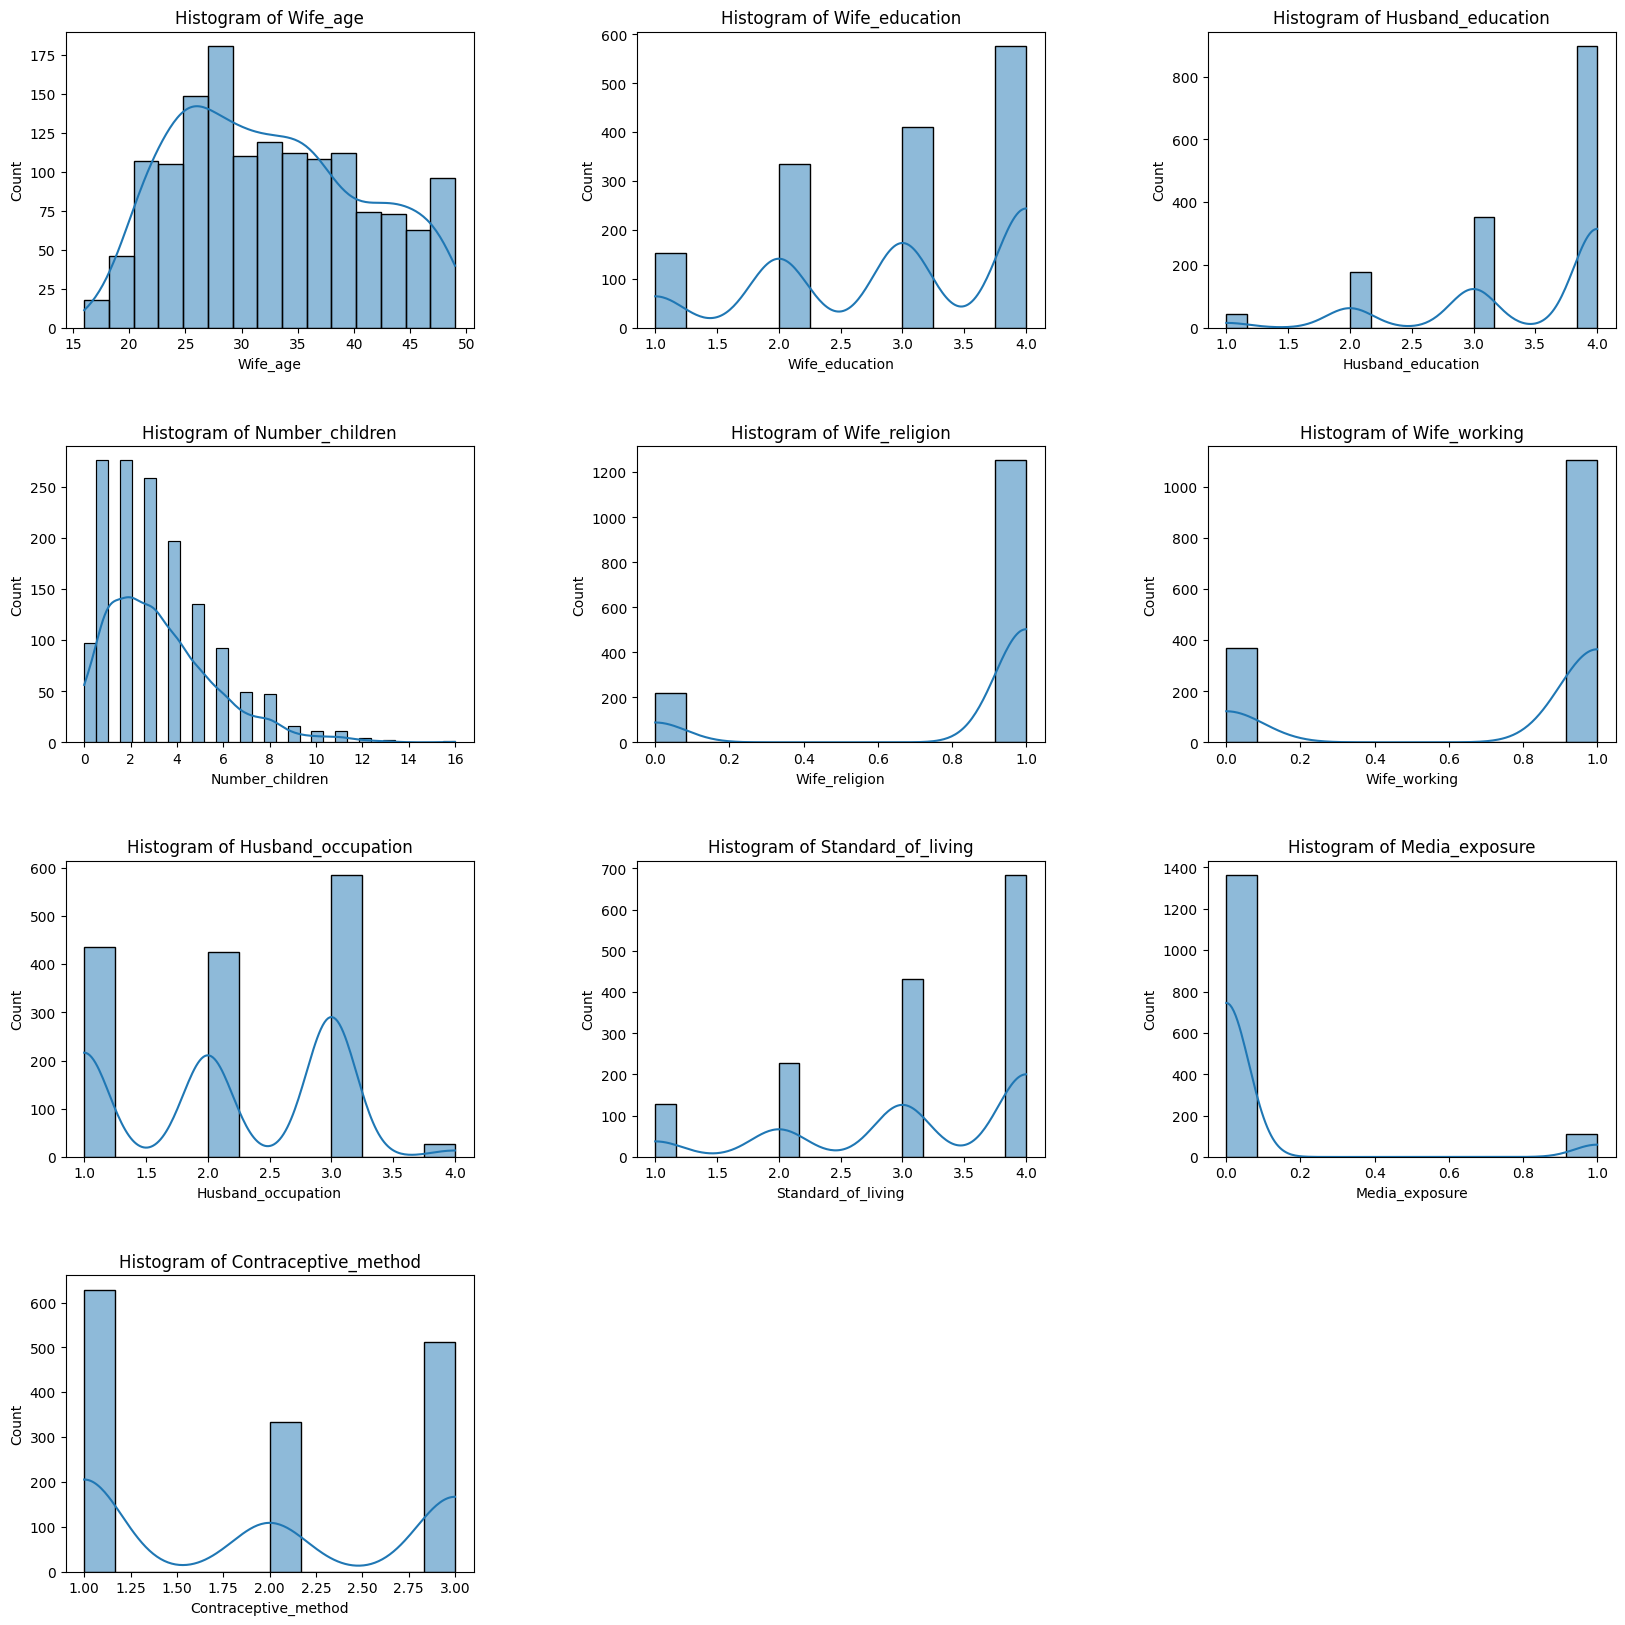

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramy dla zmiennych w układzie 4x3
fig, axs = plt.subplots(4, 3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(df.columns):
    ax = axs[i // 3, i % 3]
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')

# Usuwanie pustych sublotów
for j in range(i + 1, 4 * 3):
    fig.delaxes(axs[j // 3, j % 3])

plt.show()

# Wykresy rozrzutu

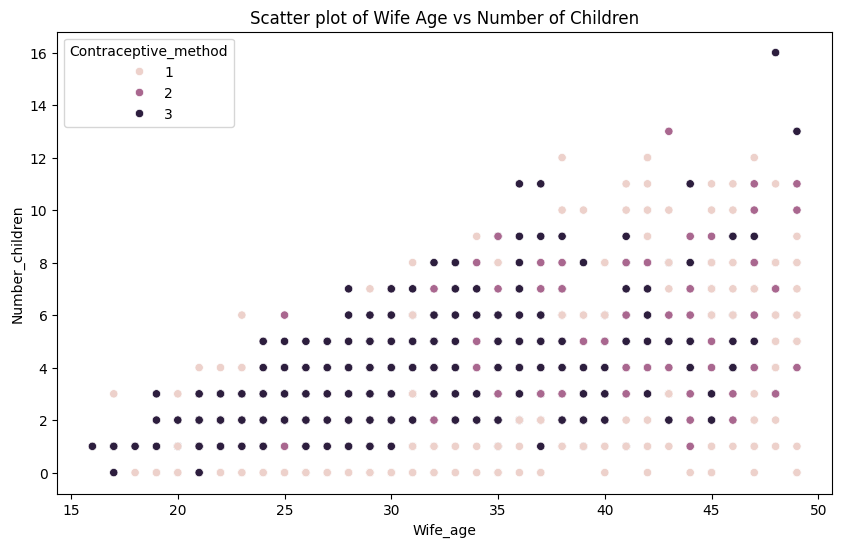

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Wife_age', y='Number_children', hue='Contraceptive_method')
plt.title('Scatter plot of Wife Age vs Number of Children')
plt.show()

In [70]:
# Grupowanie i obliczanie statystyk
grouped_stats = df.groupby('Wife_education')[numerical_cols].agg(['mean', 'median', 'std', 'count'])

# Obliczanie liczby brakujących danych dla każdej grupy
missing_data = df[numerical_cols].isnull().groupby(df['Wife_education']).sum()
missing_data = missing_data.rename(columns={col: f"{col}_missing_count" for col in missing_data.columns})

# Połączenie grouped_stats i missing_data
grouped_stats_with_missing = pd.concat([grouped_stats, missing_data], axis=1)

grouped_stats_with_missing

# Iteracja przez każdą zmienną numeryczną i wyświetlenie jej statystyk
for col in numerical_cols:
    print(f"Statystyki dla zmiennej {col}:")
    stats_table = grouped_stats[col].join(missing_data[f"{col}_missing_count"])
    print(stats_table)
    print("\n")

Statystyki dla zmiennej Wife_age:
                     mean  median       std  count  Wife_age_missing_count
Wife_education                                                            
1               37.447368    39.0  8.577492    152                       0
2               31.071856    30.0  7.927652    334                       0
3               30.907317    30.0  8.028445    410                       0
4               33.253033    33.0  7.847179    577                       0


Statystyki dla zmiennej Number_children:
                    mean  median       std  count  \
Wife_education                                      
1               4.421053     4.0  2.946603    152   
2               3.508982     3.0  2.484470    334   
3               3.234146     3.0  2.340001    410   
4               2.831889     3.0  1.976728    577   

                Number_children_missing_count  
Wife_education                                 
1                                           0  
2         

In [74]:
missing_data = df.groupby('Wife_education').sum().isnull()
missing_data

,Wife_age,Husband_education,Number_children,Wife_religion,Wife_working,Husband_occupation,Standard_of_living,Media_exposure,Contraceptive_method
Wife_education,,,,,,,,,
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


### Wykres 1: Zależność między wiekiem żony a liczbą dzieci

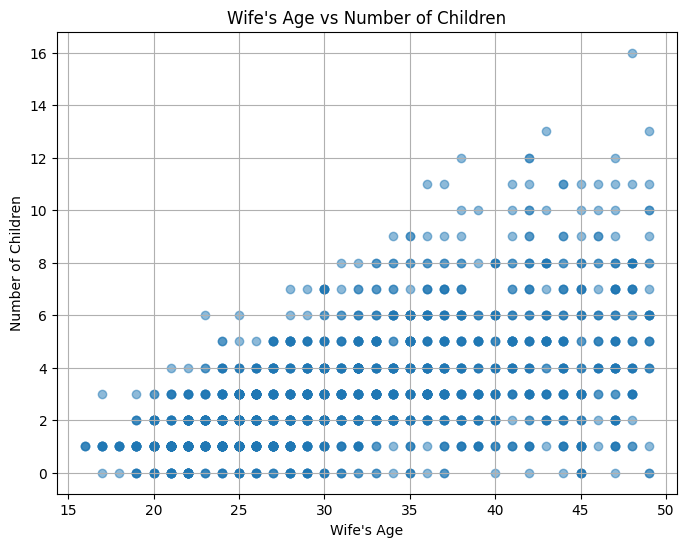

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wife_age'], df['Number_children'], alpha=0.5)
plt.title('Wife\'s Age vs Number of Children')
plt.xlabel('Wife\'s Age')
plt.ylabel('Number of Children')
plt.grid(True)
plt.show()

### Wykres 2: Zależność między wykształceniem żony a wykształceniem męża

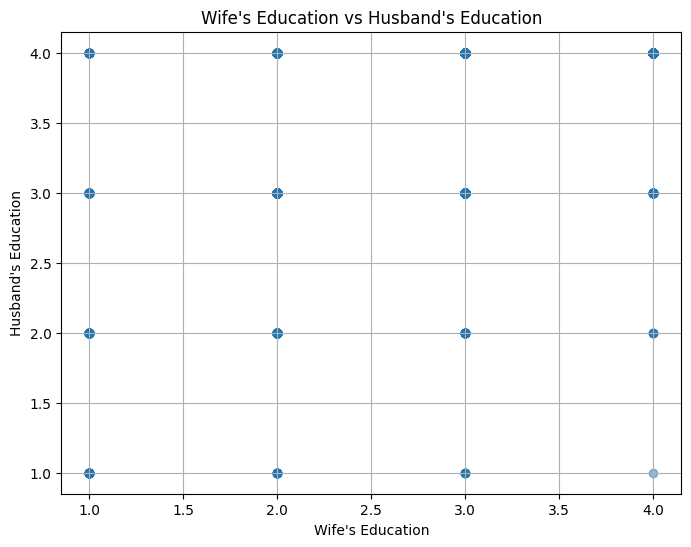

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wife_education'], df['Husband_education'], alpha=0.5)
plt.title('Wife\'s Education vs Husband\'s Education')
plt.xlabel('Wife\'s Education')
plt.ylabel('Husband\'s Education')
plt.grid(True)
plt.show()

### Wykres 3: Zależność między wiekiem żony a standardem życia

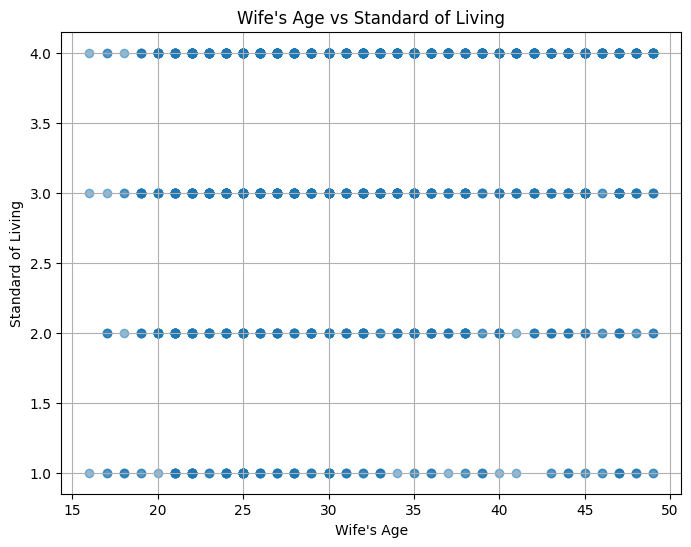

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wife_age'], df['Standard_of_living'], alpha=0.5)
plt.title('Wife\'s Age vs Standard of Living')
plt.xlabel('Wife\'s Age')
plt.ylabel('Standard of Living')
plt.grid(True)
plt.show()

### Wykres 4: Zależność między wiekiem żony a liczbą dzieci

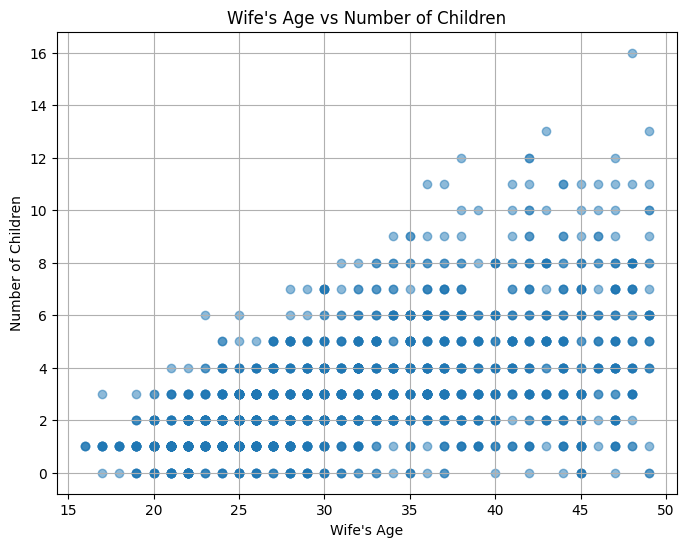

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wife_age'], df['Number_children'], alpha=0.5)
plt.title('Wife\'s Age vs Number of Children')
plt.xlabel('Wife\'s Age')
plt.ylabel('Number of Children')
plt.grid(True)
plt.show()

### Wykres 5: Zależność między wiekiem żony a standardem życia


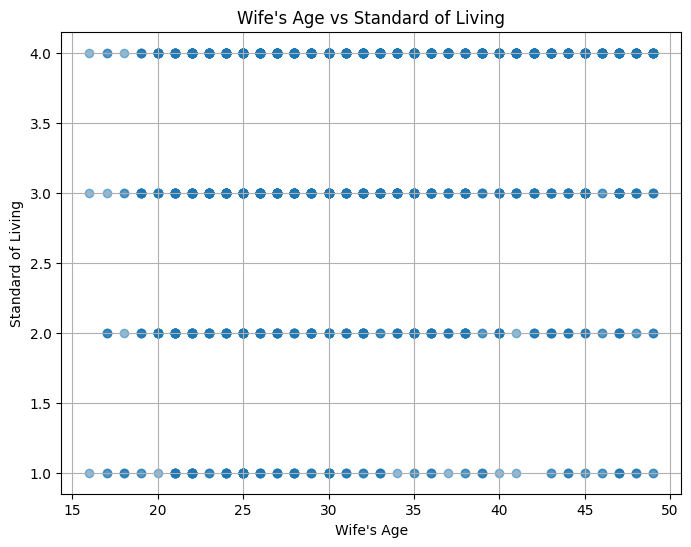

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wife_age'], df['Standard_of_living'], alpha=0.5)
plt.title('Wife\'s Age vs Standard of Living')
plt.xlabel('Wife\'s Age')
plt.ylabel('Standard of Living')
plt.grid(True)
plt.show()

### Wykres 6: Zależność między wiekiem żony a religią

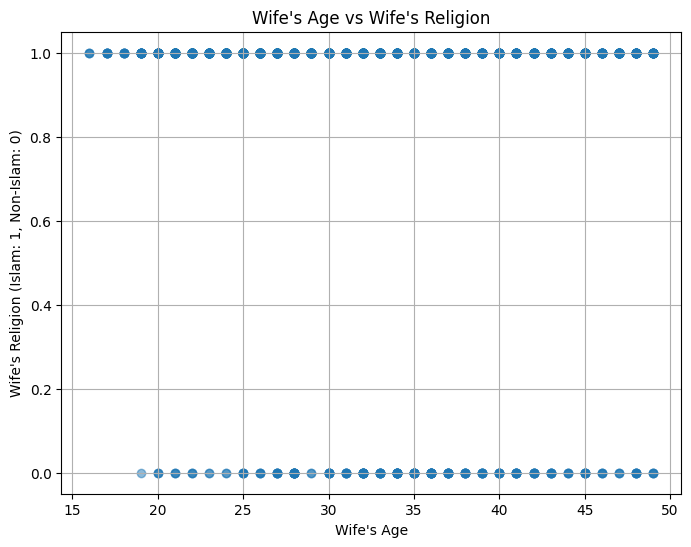

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wife_age'], df['Wife_religion'], alpha=0.5)
plt.title('Wife\'s Age vs Wife\'s Religion')
plt.xlabel('Wife\'s Age')
plt.ylabel('Wife\'s Religion (Islam: 1, Non-Islam: 0)')
plt.grid(True)
plt.show()

### Wykres 7: Zależność między wiekiem żony a pracą żony

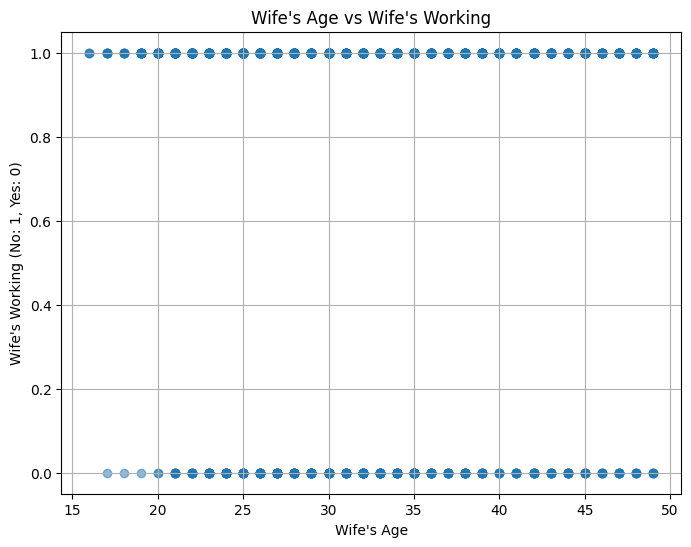

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Wife_age'], df['Wife_working'], alpha=0.5)
plt.title('Wife\'s Age vs Wife\'s Working')
plt.xlabel('Wife\'s Age')
plt.ylabel('Wife\'s Working (No: 1, Yes: 0)')
plt.grid(True)
plt.show()